In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn import svm
%matplotlib inline

In [2]:
data = scipy.io.loadmat('data/ex6data1.mat')

In [3]:
X = data['X']
y = data['y'].flatten()

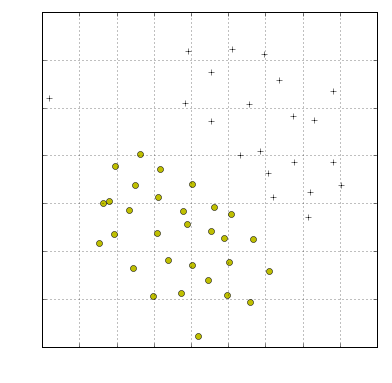

In [4]:
def plotData(X, y):
    pos = np.where(y == 1)
    nag = np.where(y == 0)
    
    plt.figure(figsize=(6, 6))
    plt.plot(X[pos,0],X[pos,1],'k+')
    plt.plot(X[nag,0],X[nag,1],'ko', color='y')
    plt.xlabel('X', color='w')
    plt.ylabel('y', color='w')
    plt.grid(True)
    plt.xticks(color='w')
    plt.yticks(color='w')
plotData(X, y)

Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. If none is given, 'rbf' will be used.

C=$\frac{1}{\lambda }$

In [5]:
C = 1
clf = svm.SVC(C=C, kernel='linear', tol=1e-3, max_iter=20)

In [6]:
model = clf.fit(X, y)

/Users/andy/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


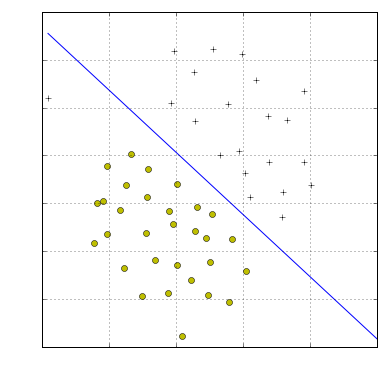

In [7]:
def visualizeBoundaryLinear(X, y ,model):
    w = model.coef_.flatten()
    b = model.intercept_.flatten()
    
    xp = np.linspace(min(X[:,0]), 5)
    yp = -(w[0]*xp + b)/w[1]
    plotData(X, y)
    plt.plot(xp, yp, '-b')
visualizeBoundaryLinear(X, y, model)

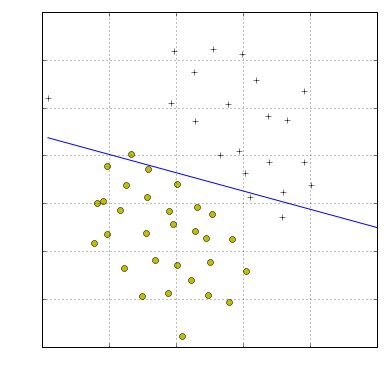

In [8]:
C = 100
clf = svm.SVC(C=C, kernel='linear', tol=1e-3, max_iter=20)
model = clf.fit(X, y)
visualizeBoundaryLinear(X, y, model)

In [9]:
x1 = np.array([1 ,2 ,1]); x2 = np.array([0 ,4 ,-1]); sigma = 2.;

### 高斯kernel

$$h(x) = \theta _{0} + \theta _{1}x_{1}+ \theta _{2}x_{2}+ \theta _{3}x_{3} = \theta _{0} + \theta _{1}f_{1}+ \theta _{2}f_{2}+ \theta _{3}f_{3}$$

轉換一下特徵 $$f_{1}=exp(-\frac{\left \| x-l^{(1)} \right \|^{2}}{2\sigma ^{2}})$$

In [10]:
def gaussianKernel(x1, x2, sigma):
    return np.e ** (-np.sum((x1 - x2) ** 2) / (2 * sigma ** 2))
gaussianKernel(x1, x2, sigma)

0.32465246735834974

In [11]:
data = scipy.io.loadmat('data/ex6data2.mat')

In [12]:
X = data['X']
y = data['y'].flatten()

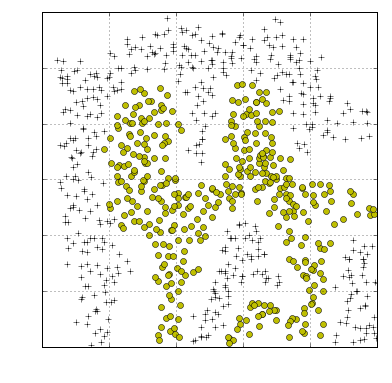

In [13]:
plotData(X, y)

In [14]:
C = 1; sigma = 0.1;

In [15]:
gamma = 1. / (2. * sigma ** 2)

In [16]:
clf = svm.SVC(C=C, kernel='rbf', tol=1e-3, max_iter=200, gamma = gamma)

In [17]:
model = clf.fit(X, y)

/Users/andy/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


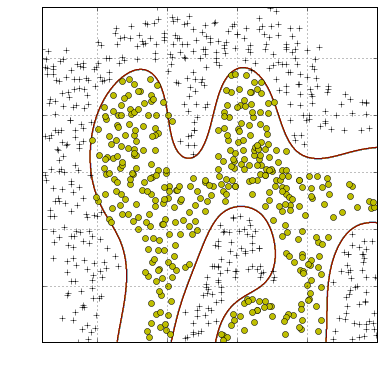

In [18]:
def visualizeBoundary(X, y, model):
    """plots a non-linear decision boundary learned by the
    SVM and overlays the data on it"""

# Plot the training data on top of the boundary
    plotData(X, y)

    # Make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), X.shape[0]).T
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), X.shape[0]).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i]))
        vals[:, i] = model.predict(this_X)

    # Plot the SVM boundary
    #contour(X1, X2, vals, [0 0], 'Color', 'b')
    plt.contour(X1, X2, vals)
visualizeBoundary(X, y, model)

In [19]:
data = scipy.io.loadmat('data/ex6data3.mat')

In [20]:
X = data['X']
Xval = data['Xval']
y = data['y'].flatten()
yval = data['yval'].flatten()

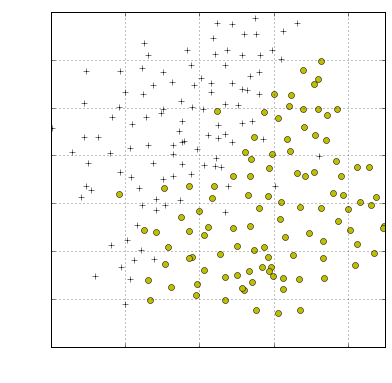

In [21]:
plotData(X, y)

In [22]:
def dataset3Params(X, y, Xval, yval):
    C = 0
    sigma = 0

    param = [0.01 , 0.03, 0.1, 0.3, 1, 3, 10, 30]
    minError = 10000.0
    for Cval in param:
        for sigmaVal in param:
            gamma = 1. / (2. + sigmaVal ** 2)
            model = svm.SVC(C=Cval, kernel='rbf', tol=1e-3, gamma=gamma)
            model.fit(X, y)
            predictions = model.predict(Xval)
            error = (yval != predictions).mean()
            # print 'C: %d, sigma: %d ,mean: %f' % (Cval, sigmaVal, 1*(yval != predictions).mean())
            if minError > error:
                minError = error
                C = Cval
                sigma = sigmaVal
    return C, sigma
C, sigma = dataset3Params(X, y, Xval, yval)
print C, sigma

3 1


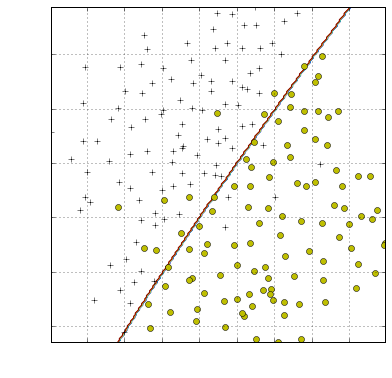

In [23]:
gamma = 1. / (2. * sigma ** 2)
clf = svm.SVC(C=C, kernel='rbf', gamma = gamma)
model = clf.fit(X, y)
visualizeBoundary(X, y, model)

下面看一下SVM中的參數對結果的影響。  
C 較大時，相當於λ較小，可能會導致過擬合，高Variance  
C 較小時，相當於λ較大，可能會導致欠擬合，高Bias  
σ 較大時，f變化更加平緩，這導致你的模型隨著x的變化而緩慢變化，導致欠擬合，高Bias  
σ 較小時，f變化劇烈，導致過擬合，導致高Variance

如何選擇邏輯回歸和支持向量機呢？  
下面是一些普遍使用的準則：  
如果相較於m而言，正要大許多，即訓練集數據量不夠支持我們訓練一個複雜的非線性模型，我們選用邏輯回歸模型或者不帶核函數的支持向量機。  
如果特徵較小，而且m大小中等，例如特徵在1-1000之間，而m在10-10000之間，使用帶高斯核函數的支持向量機。  
如果特徵較小，而m較大，例如ñ在1-1000之間，而m大於50000，則使用支持向量機會非常慢，解決方案是創造，增加更多的特徵，然後使用邏輯回歸或不帶核函數的支持向量機。  
值得一提的是，神經網絡在以上三種情況下都可能會有較好的表現，但是訓練神經網絡可能非常慢，選擇支持向量機的原因主要在於它的代價函數是凸函數，不存在局部最小值。